In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate , StratifiedKFold  , ParameterGrid


In [6]:
def read_csv(csv_name):
    return pd.read_csv(csv_name).values

In [28]:
def run_classification(X, Y, classifier, cv,prints_flag=False):
    cv_results = cross_validate(classifier, X, Y, cv=cv, scoring='accuracy', return_train_score=True , n_jobs=-1) #prompt 1
    #n_jobs=-1 means using all processors

    if prints_flag: print(f'Using {classifier}:')
    train_means = cv_results['train_score'].mean() * 100
    test_means = cv_results['test_score'].mean() * 100
    if prints_flag: #using it in 2 diff places, in one of them we want to remove the prints
        print(f'Average accuracy on train: {train_means:.3f}%')
        print(f'Average accuracy on test: {test_means:.3f}%\n')

    return train_means, test_means

In [21]:
# function to plot the accuracy of all the classifieries train and test side by side
def plot_accuracy(train_accuracies, test_accuracies):  #prompt 2
    classifier_short_names = ["KNN", "QDA", "DTC", "RFC", "LDA", "GNB"]
    n = len(classifier_short_names)
    index = range(n)
    
    fig, ax = plt.subplots(figsize=(14, 6)) 

    bar_width = 0.35
    opacity = 0.8

    bars1 = ax.bar(index, train_accuracies, bar_width, alpha=opacity, color='b', label='Train')

    bars2 = ax.bar([p + bar_width for p in index], test_accuracies, bar_width, alpha=opacity, color='g', label='Test')

    ax.set_xlabel('Classifier')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('Training and Testing Accuracy by Classifier')
    ax.set_xticks([p + bar_width / 2 for p in index])
    ax.set_xticklabels(classifier_short_names)
    ax.set_ylim([0, 105])
    ax.legend()

    def add_labels(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('%.2f%%' % height,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_labels(bars1)
    add_labels(bars2)

    plt.tight_layout()
    plt.show()

In [22]:
#same function as above - now to plot the regular and the fine-tuning tests only result
def plot_accuracy_of_tests(regular, fine_tuning):  
    classifier_short_names = ["KNN", "QDA", "DTC", "RFC", "LDA", "GNB"]
    n = len(classifier_short_names)
    index = range(n)
    
    fig, ax = plt.subplots(figsize=(14, 6))

    bar_width = 0.35
    opacity = 0.8

    bar1 = ax.bar(index, regular, bar_width, alpha=opacity, color='red', label='Regular')

    bar2 = ax.bar([p + bar_width for p in index], fine_tuning, bar_width, alpha=opacity, color='orange', label='Fine Tuning')

    ax.set_xlabel('Classifier')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('Regular Data VS Fine Tuning By Classifier')
    ax.set_xticks([p + bar_width / 2 for p in index])
    ax.set_xticklabels(classifier_short_names)
    ax.set_ylim([0, 105])
    ax.legend()

    def add_labels(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('%.2f%%' % height,
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3), 
                        textcoords="offset points",
                        ha='center', va='bottom')

    add_labels(bar1)
    add_labels(bar2)

    plt.tight_layout()
    plt.show()

In [31]:
def custom_classification(classifiers_array,X,Y,plot_flag=True):
    cv = StratifiedKFold(n_splits=100, shuffle=True, random_state=42) #prompt 3
 
    # scoring = {'accuracy': make_scorer(accuracy_score)}

    train_accuracies = []
    test_accuracies = []

    for classifier in classifiers_array:
        train_means, test_means = run_classification(X, Y, classifier, cv , prints_flag=True)
        train_accuracies.append(train_means) 
        test_accuracies.append(test_means)
    
    if plot_flag: plot_accuracy(train_accuracies,test_accuracies)

    return test_accuracies

In [30]:
def single_custom_classification(classifier,X,Y):    
    cv = StratifiedKFold(n_splits=30, shuffle=True, random_state=42) #prompt 3
  
    train_means, test_means = run_classification(X, Y, classifier, cv)

    return train_means, test_means

In [32]:
def find_best_hyperparameters(X, Y, classifier_init, param_grid):
    best_train_accuracy = 0
    best_test_accuracy = 0
    best_params_train = None
    best_params_test = None
    
    for params in ParameterGrid(param_grid): #prompt 4
        classifier = classifier_init(**params)
        train_accuracy, test_accuracy = single_custom_classification(classifier,X,Y)
        
        if train_accuracy > best_train_accuracy:
            best_train_accuracy = train_accuracy
            best_params_train = params
        
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_params_test = params
            
    print(f"Best Training Accuracy: {best_train_accuracy:.3f}% with parameters {best_params_train}")
    print(f"Best Testing Accuracy: {best_test_accuracy:.3f}% with parameters {best_params_test}")
    
    return best_train_accuracy, best_test_accuracy, best_params_train, best_params_test

Section 7 - Text Pretrained Embeddings

In [26]:
# get the labels for the train and test
df_GT = pd.read_csv('TextExamples.csv')
Y = df_GT['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
X = read_csv('TextPretrainedEmbeddings.csv')

Using KNeighborsClassifier():
Average accuracy on train: 80.903%
Average accuracy on test: 70.302%

Using QuadraticDiscriminantAnalysis():
Average accuracy on train: 89.758%
Average accuracy on test: 74.068%

Using DecisionTreeClassifier():
Average accuracy on train: 100.000%
Average accuracy on test: 63.548%

Using RandomForestClassifier():
Average accuracy on train: 100.000%
Average accuracy on test: 76.032%

Using LinearDiscriminantAnalysis():
Average accuracy on train: 81.274%
Average accuracy on test: 80.316%

Using GaussianNB():
Average accuracy on train: 71.171%
Average accuracy on test: 70.739%



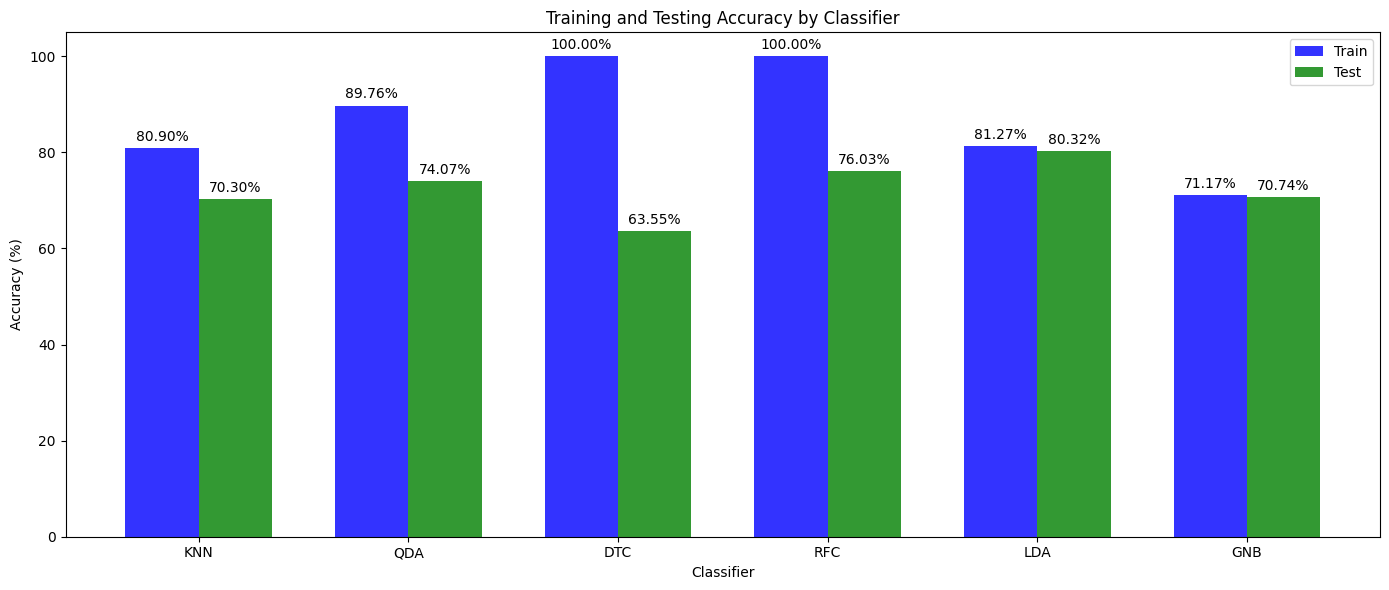

In [29]:
#without changes
classifiers_array = [   KNeighborsClassifier(),
                        QuadraticDiscriminantAnalysis(),
                        DecisionTreeClassifier(),
                        RandomForestClassifier(),
                        LinearDiscriminantAnalysis(),
                        GaussianNB()]
test_accuracies = custom_classification(classifiers_array,X,Y)

Using KNeighborsClassifier(leaf_size=1, n_jobs=1, n_neighbors=35):
Average accuracy on train: 75.470%
Average accuracy on test: 73.434%

Using QuadraticDiscriminantAnalysis(store_covariance=True):
Average accuracy on train: 89.758%
Average accuracy on test: 74.068%

Using DecisionTreeClassifier(max_depth=7, max_leaf_nodes=120, min_samples_split=3):
Average accuracy on train: 79.589%
Average accuracy on test: 68.689%

Using RandomForestClassifier(max_depth=11, min_samples_split=5, n_estimators=120):
Average accuracy on train: 97.464%
Average accuracy on test: 75.638%

Using LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',
                           store_covariance=True):
Average accuracy on train: 81.479%
Average accuracy on test: 80.487%

Using GaussianNB(var_smoothing=0.001):
Average accuracy on train: 71.168%
Average accuracy on test: 70.757%



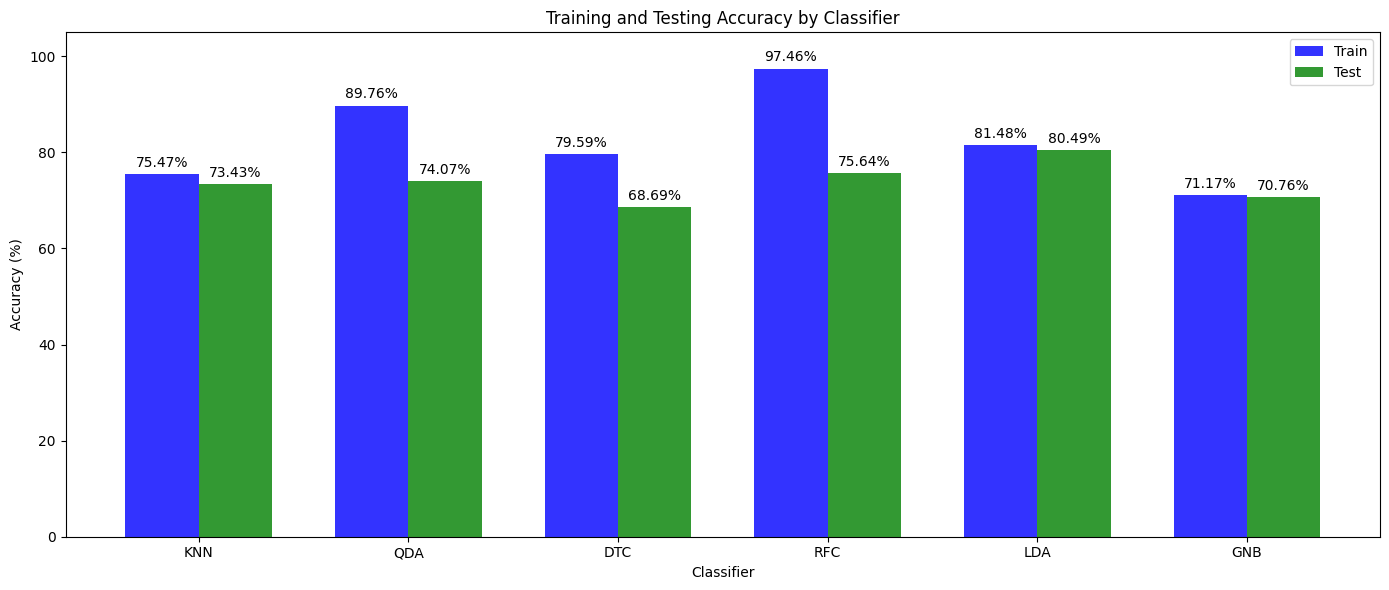

In [24]:
#the best we found
classifiers_array = [   KNeighborsClassifier(n_neighbors=35, leaf_size=1 , n_jobs=1),
                        QuadraticDiscriminantAnalysis(store_covariance=True),
                        DecisionTreeClassifier(criterion='gini' , max_leaf_nodes=120 , max_depth=7 , splitter='best' , min_samples_split=3),
                        RandomForestClassifier(n_estimators=120, max_depth=11, min_samples_split=5),
                        LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto', store_covariance=True),
                        GaussianNB(var_smoothing=0.001)
                    ]
test_accuracies_regular = custom_classification(classifiers_array,X,Y)

Checks Hyperparameters for TextPretrainedEmbeddings.csv

In [42]:
classifier_init = KNeighborsClassifier

hyperparameters = {
    'n_neighbors': [20,35,40],
    'leaf_size': [1,10,20,30,40,50],
    'n_jobs': [1,2,3] 
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X, Y, classifier_init, hyperparameters)

Best Training Accuracy: 76.182% with parameters {'leaf_size': 1, 'n_jobs': 1, 'n_neighbors': 20}
Best Testing Accuracy: 73.434% with parameters {'leaf_size': 1, 'n_jobs': 1, 'n_neighbors': 35}


In [37]:
classifier_init = GaussianNB

hyperparameters = {
    'var_smoothing': [0.1,0.01,0.001,0.0001,0.00001]
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X, Y, classifier_init, hyperparameters)

Best Training Accuracy: 71.171% with parameters {'var_smoothing': 0.0001}
Best Testing Accuracy: 70.757% with parameters {'var_smoothing': 0.001}


In [38]:
classifier_init = QuadraticDiscriminantAnalysis

hyperparameters = {
    'store_covariance': [True,False]
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X, Y, classifier_init, hyperparameters)

Best Training Accuracy: 89.758% with parameters {'store_covariance': True}
Best Testing Accuracy: 74.068% with parameters {'store_covariance': True}


In [39]:
classifier_init = LinearDiscriminantAnalysis

hyperparameters = {
    'solver': ['svd','lsqr'],
    'store_covariance': [True,False] 
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X, Y, classifier_init, hyperparameters)

hyperparameters = {
    'solver': ['lsqr'],
    'shrinkage': ['auto'],
    'store_covariance': [True,False] 
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X, Y, classifier_init, hyperparameters)

Best Training Accuracy: 81.274% with parameters {'solver': 'svd', 'store_covariance': True}
Best Testing Accuracy: 80.316% with parameters {'solver': 'svd', 'store_covariance': True}
Best Training Accuracy: 81.479% with parameters {'shrinkage': 'auto', 'solver': 'lsqr', 'store_covariance': True}
Best Testing Accuracy: 80.487% with parameters {'shrinkage': 'auto', 'solver': 'lsqr', 'store_covariance': True}


In [40]:
classifier_init = DecisionTreeClassifier

hyperparameters = {
    'max_leaf_nodes': [50,100,120,200,220],
    'max_depth': [2,4,7,9],
    'min_samples_split': [3,5,10,13]
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X, Y, classifier_init, hyperparameters)


Best Training Accuracy: 85.959% with parameters {'max_depth': 9, 'max_leaf_nodes': 220, 'min_samples_split': 5}
Best Testing Accuracy: 68.775% with parameters {'max_depth': 7, 'max_leaf_nodes': 120, 'min_samples_split': 3}


In [41]:
classifier_init = RandomForestClassifier

hyperparameters = {
    'n_estimators': [50,100,120,200,220],
    'max_depth': [7,9,11],
    'min_samples_split': [3,5,7]
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X, Y, classifier_init, hyperparameters)

Best Training Accuracy: 97.876% with parameters {'max_depth': 11, 'min_samples_split': 3, 'n_estimators': 220}
Best Testing Accuracy: 76.445% with parameters {'max_depth': 11, 'min_samples_split': 5, 'n_estimators': 120}


Section 8 - Text Finetuned Embeddings

In [12]:
df_GT = pd.read_csv('TextExamples.csv')
Y = df_GT['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
X_Finetuned = read_csv('TextFinetunedEmbeddings.csv')

Using KNeighborsClassifier():
Average accuracy on train: 92.374%
Average accuracy on test: 89.836%

Using QuadraticDiscriminantAnalysis():
Average accuracy on train: 92.585%
Average accuracy on test: 90.524%

Using DecisionTreeClassifier():
Average accuracy on train: 100.000%
Average accuracy on test: 85.503%

Using RandomForestClassifier():
Average accuracy on train: 99.999%
Average accuracy on test: 90.577%

Using LinearDiscriminantAnalysis():
Average accuracy on train: 91.875%
Average accuracy on test: 91.229%

Using GaussianNB():
Average accuracy on train: 90.104%
Average accuracy on test: 90.112%



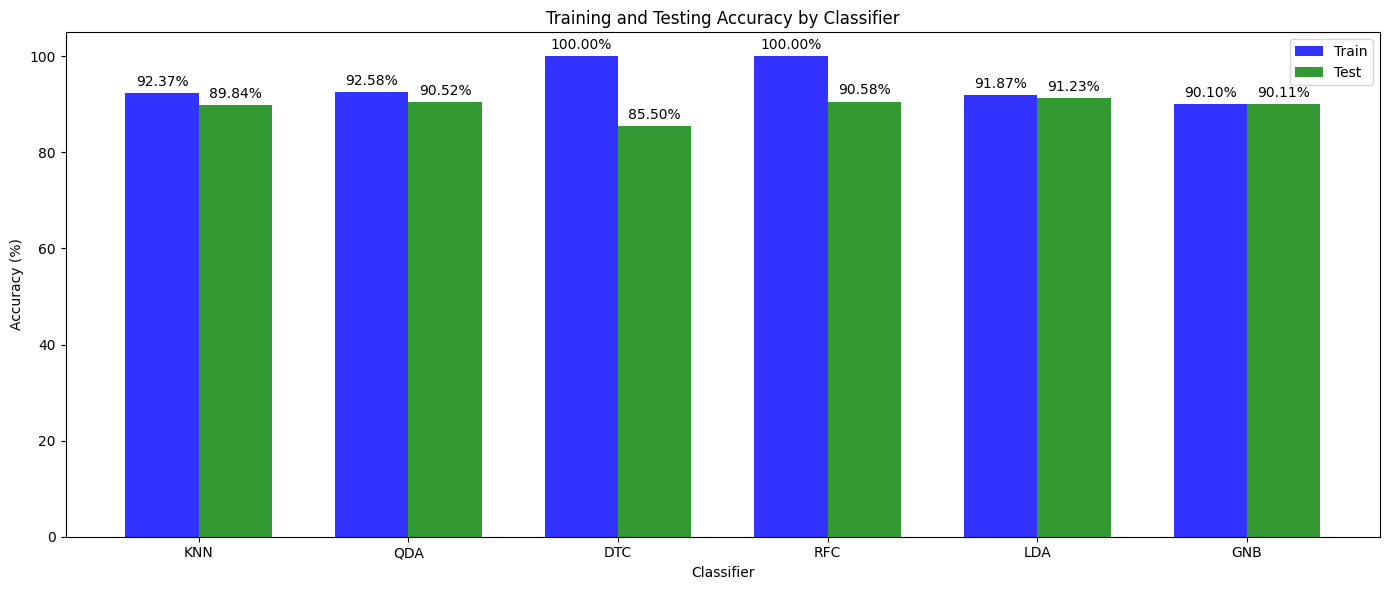

In [13]:
# Original APIs
classifiers_array = [   KNeighborsClassifier(),
                        QuadraticDiscriminantAnalysis(),
                        DecisionTreeClassifier(),
                        RandomForestClassifier(),
                        LinearDiscriminantAnalysis(),
                        GaussianNB()
                    ]
plot_flag = True
test_accuracies = custom_classification(classifiers_array,X_Finetuned,Y)


Using KNeighborsClassifier(leaf_size=1, n_jobs=1, n_neighbors=35):
Average accuracy on train: 90.941%
Average accuracy on test: 90.696%

Using QuadraticDiscriminantAnalysis(store_covariance=True):
Average accuracy on train: 92.585%
Average accuracy on test: 90.524%

Using DecisionTreeClassifier(max_depth=4, max_leaf_nodes=100, min_samples_split=13):
Average accuracy on train: 91.183%
Average accuracy on test: 89.595%

Using RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=220):
Average accuracy on train: 94.119%
Average accuracy on test: 90.662%

Using LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr',
                           store_covariance=True):
Average accuracy on train: 91.864%
Average accuracy on test: 91.281%

Using GaussianNB(var_smoothing=0.0001):
Average accuracy on train: 90.102%
Average accuracy on test: 90.112%



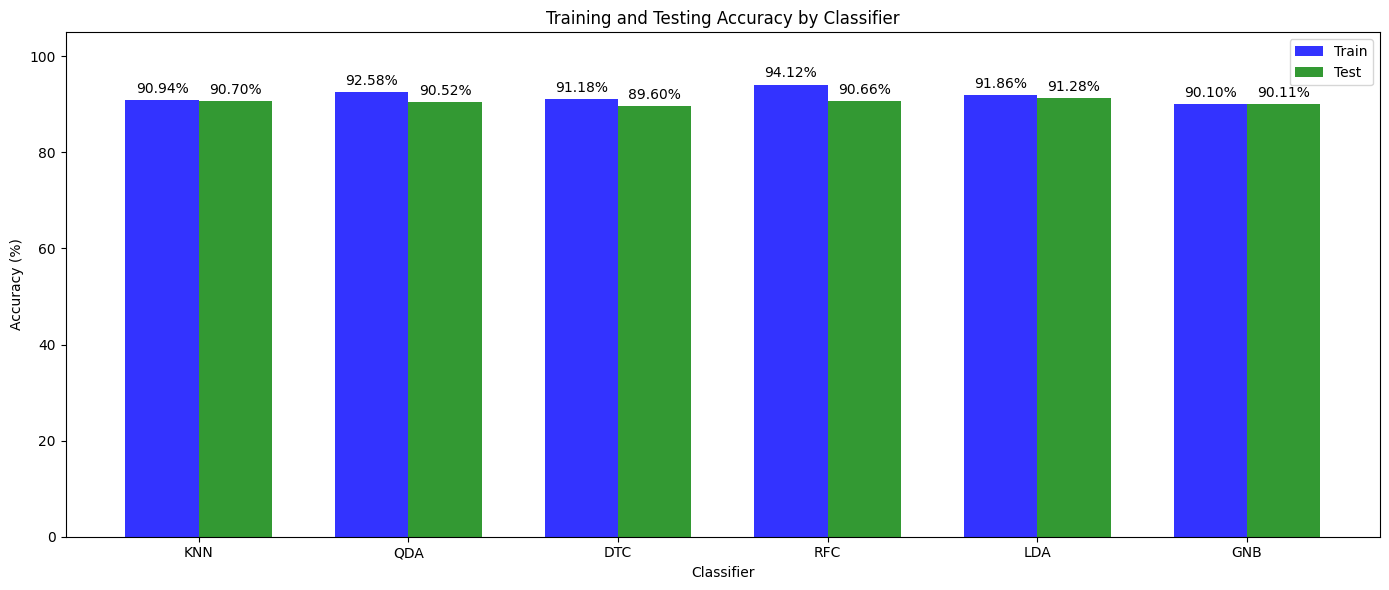

In [18]:
# our changes:
classifiers_array = [   KNeighborsClassifier(n_neighbors=35, leaf_size=1 , n_jobs=1),
                        QuadraticDiscriminantAnalysis(store_covariance=True),
                        DecisionTreeClassifier(criterion='gini' , max_leaf_nodes=100 , max_depth=4 , splitter='best' , min_samples_split=13),
                        RandomForestClassifier(n_estimators=220, max_depth=7, min_samples_split=3),
                        LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto', store_covariance=True),
                        GaussianNB(var_smoothing=0.0001)
                    ]
plot_flag = True
test_accuracies_fine_tuning = custom_classification(classifiers_array,X_Finetuned,Y)


Checks Hyperparameters for TextFinetunedEmbeddings.csv

In [49]:
classifier_init = KNeighborsClassifier

hyperparameters = {
    'n_neighbors': [20,35,40],
    'leaf_size': [1,10,20,30,40,50],
    'n_jobs': [1,2,3] 
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X_Finetuned, Y, classifier_init, hyperparameters)

Best Training Accuracy: 91.044% with parameters {'leaf_size': 1, 'n_jobs': 1, 'n_neighbors': 20}
Best Testing Accuracy: 90.696% with parameters {'leaf_size': 1, 'n_jobs': 1, 'n_neighbors': 35}


In [50]:
classifier_init = QuadraticDiscriminantAnalysis

hyperparameters = {
    'store_covariance': [True,False]
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X_Finetuned, Y, classifier_init, hyperparameters)

Best Training Accuracy: 92.585% with parameters {'store_covariance': True}
Best Testing Accuracy: 90.524% with parameters {'store_covariance': True}


In [51]:
classifier_init = DecisionTreeClassifier

hyperparameters = {
    'max_leaf_nodes': [50,100,120,200,220],
    'max_depth': [2,4,7,9],
    'min_samples_split': [3,5,10,13]
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X_Finetuned, Y, classifier_init, hyperparameters)


Best Training Accuracy: 96.165% with parameters {'max_depth': 9, 'max_leaf_nodes': 200, 'min_samples_split': 3}
Best Testing Accuracy: 89.630% with parameters {'max_depth': 4, 'max_leaf_nodes': 100, 'min_samples_split': 13}


In [55]:
classifier_init = RandomForestClassifier

hyperparameters = {
    'n_estimators': [50,100,120,200,220],
    'max_depth': [7,9,11],
    'min_samples_split': [3,5,7]
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X_Finetuned, Y, classifier_init, hyperparameters)


Best Training Accuracy: 97.627% with parameters {'max_depth': 11, 'min_samples_split': 3, 'n_estimators': 220}
Best Testing Accuracy: 90.731% with parameters {'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 220}


In [52]:
classifier_init = LinearDiscriminantAnalysis

hyperparameters = {
    'solver': ['svd','lsqr'],
    'store_covariance': [True,False] 
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X_Finetuned, Y, classifier_init, hyperparameters)

hyperparameters = {
    'solver': ['lsqr'],
    'shrinkage': ['auto'],
    'store_covariance': [True,False] 
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X_Finetuned, Y, classifier_init, hyperparameters)

Best Training Accuracy: 91.875% with parameters {'solver': 'svd', 'store_covariance': True}
Best Testing Accuracy: 91.229% with parameters {'solver': 'svd', 'store_covariance': True}
Best Training Accuracy: 91.864% with parameters {'shrinkage': 'auto', 'solver': 'lsqr', 'store_covariance': True}
Best Testing Accuracy: 91.281% with parameters {'shrinkage': 'auto', 'solver': 'lsqr', 'store_covariance': True}


In [53]:
classifier_init = GaussianNB

hyperparameters = {
    'var_smoothing': [0.1,0.01,0.001,0.0001,0.00001]
}

best_train_accuracy, best_test_accuracy, best_params_train, best_params_test = find_best_hyperparameters(X_Finetuned, Y, classifier_init, hyperparameters)

Best Training Accuracy: 90.103% with parameters {'var_smoothing': 1e-05}
Best Testing Accuracy: 90.112% with parameters {'var_smoothing': 0.0001}


Compare results regular and fine-tuning

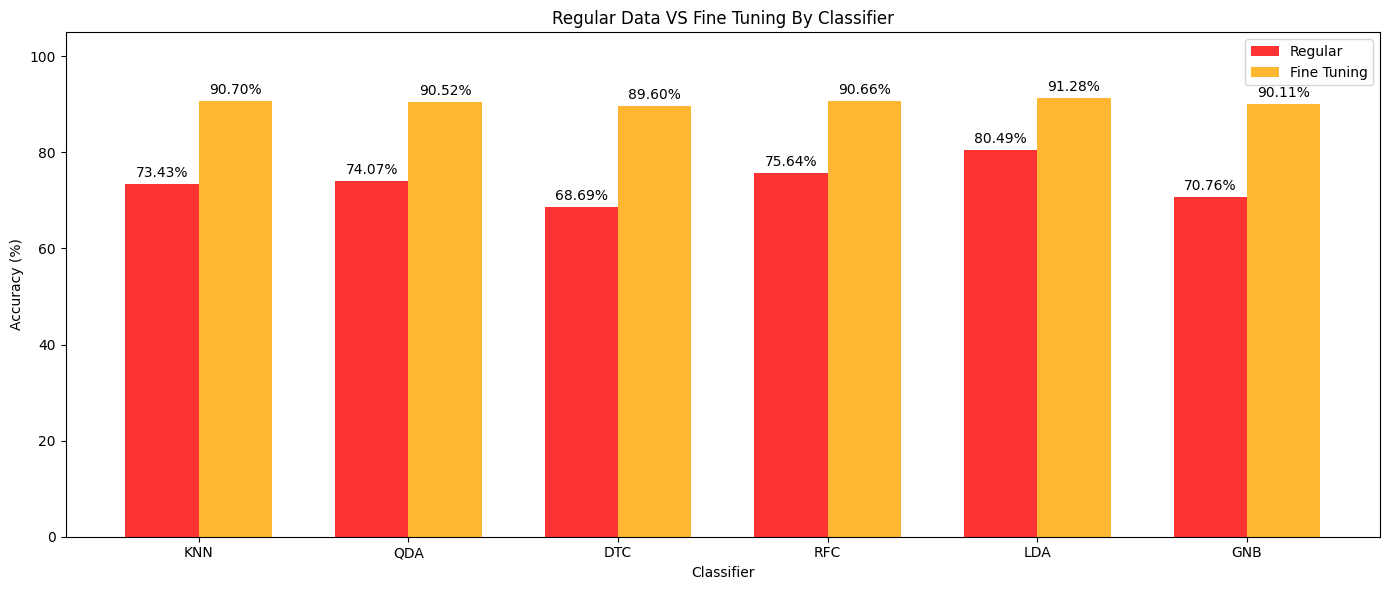

In [25]:
plot_accuracy_of_tests(test_accuracies_regular,test_accuracies_fine_tuning)